In [1]:
import requests
from bs4 import BeautifulSoup
import ssl
import os
from wordcloud import WordCloud
import matplotlib
import jieba
import matplotlib.pyplot as plt
import re
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
useragent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
headers = {'User-Agent' : useragent }
url = 'https://www.rti.org.tw/news/view/id/2037408?fbclid=IwAR3vdKWQCCOMRVCjbj_BHAqjlJvrbBf2bDSvJuNGAt9csNpN3ybX1_Fni0M'

In [3]:
res = requests.get(url, headers = headers)

In [4]:
soup = BeautifulSoup(res.text,'html.parser')

In [6]:
a = soup.select('article')

In [7]:
speech = a[0].select('p')

In [8]:
resouce_path = r'./test'
if not os.path.exists(resouce_path):
    os.mkdir(resouce_path)
    
    
for i in speech:
    final = i.text
    with open(r'%s/%s.txt'%(resouce_path,'final'),'a+',encoding='utf-8') as w:
                    w.write(final)  

In [9]:
plt.rc('font',family='Noto Sans CJK TC')

In [10]:
path = '/Users/tybillchou/PycharmProjects/pyetl/venv/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansCJKtc-Regular.otf'

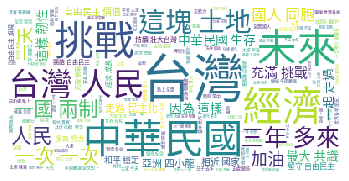

In [24]:
text = open('/Users/tybillchou/PycharmProjects/pyetl/test/final.txt').read()
cont = re.sub(r'\W', '', text)
wordlist_after_jieba = jieba.lcut(cont, cut_all = False)

word = ['的','是','在','也','了','我們','但']
for i in word:
    while i in wordlist_after_jieba:
        wordlist_after_jieba.remove(i)
    
final_str = ' '.join(wordlist_after_jieba)
wordcloud = WordCloud(background_color = 'white',font_path=path).generate(final_str)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


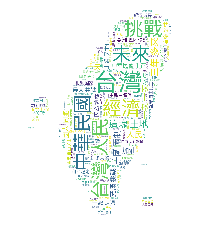

In [21]:
import imageio
back_color = imageio.imread('/Users/tybillchou/Desktop/taiwan1.jpg')
wc = WordCloud(background_color='white',mask=back_color,random_state=5,font_path=path)
wc.generate(final_str)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
fig_path = './text1.png'
wc.to_file(fig_path)